Презентация: [<ссылка на облачное хранилище с презентацией>](https://disk.yandex.ru/i/usD48_nrPQo2yA)

# Сегментирование покупателей интернет-магазина «Пока всё ещё тут»

**Описание проекта**

Отдел маркетинга интернет-магазина товаров для дома и быта «Пока все ещё тут» столкнулся с задачей определения профилей потребления. Важно понять, каким клиентам и в какое время следует направлять рекламные предложения о конкретных категориях товаров.

**Описание данных**

В распоряжении имеется датасет, описывающий транзакции в интернет-магазине «Пока все ещё тут». В него входят следующие параметры: дата и идентификатор заказа, количество товаров в заказе, их цена и идентификатор пользователя.

**Цель исследования**

Цель исследования заключается в предоставлении комплексного анализа и рекомендаций, направленных на увеличение продаж и повышение лояльности клиентов через сегментацию маркетинга.

**Ход исследования**

Шаг 1. Открытие файла с данными и анализ общей информации

Шаг 2. Предобработка данных

- Проверка наличия пропусков, типов данных и дубликатов. При необходимости внесение корректировок.
- Добавление столбца с названием категории товара и столбца с датой.

Шаг 3. Анализ данных

- Сколько всего покупок совершают пользователи? Какие товары покупают?
- Каков средний чек пользователей и его динамика?
- Как меняется выручка по месяцам?
- Проанализируем изменение количества покупок с течением времени. Построим столбчатую диаграмму, отражающую количество событий в зависимости от времени.

Шаг 4. Сегментирование покупателей на основе их истории покупок

- Проведем RFM анализ, чтобы разделить покупателей на три группы: покупающие недавно, давно и очень давно.
- Проанализируем покупателей.

Шаг 5. Проверка гипотезы

- Н0 – Средние чеки категорий одинаковы.
- Н1 – Средние чеки категорий отличаются.


- Н0 – различий в среднем количестве заказов между группами нет. 
- Н1 – различия в среднем между группами есть.

Шаг 6. Вывод

## Анализ общей информации

In [1]:
import pandas as pd
import datetime as dt
import scipy.stats as stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date, timedelta
from scipy import stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
matplotlib.style.use('seaborn') 
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image, display

In [2]:
data = pd.read_csv('/datasets/ecom_dataset_upd.csv')
data

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
7469,2020013021,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0
7470,2020013022,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
7471,2020013102,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0
7472,2020013112,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0


In [3]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H') # изменим тип данных
# Введём новый столбец. В одном столбце будем указывать дату, а в другом — дату и время.
data['time'] = data['date']
data['date'] = data['date'].dt.normalize()
data.head()

,date,customer_id,order_id,product,quantity,price,time
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         7474 non-null   datetime64[ns]
 1   customer_id  7474 non-null   object        
 2   order_id     7474 non-null   int64         
 3   product      7474 non-null   object        
 4   quantity     7474 non-null   int64         
 5   price        7474 non-null   float64       
 6   time         7474 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 408.9+ KB


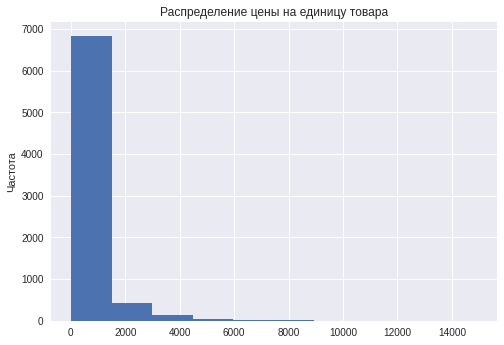

count     7474.000000
mean       478.737501
std        901.615895
min          9.000000
25%         97.000000
50%        135.000000
75%        439.000000
max      14917.000000
Name: price, dtype: float64

In [5]:
ax = data['price'].plot(kind='hist',title='Распределение цены на единицу товара')
ax.set_ylabel('Частота')
plt.show();
data['price'].describe()

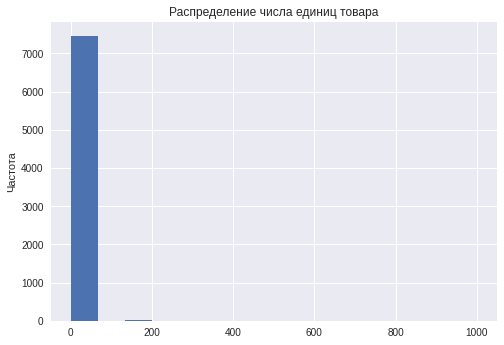

count    7474.000000
mean        2.362858
std        14.500497
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1000.000000
Name: quantity, dtype: float64

In [6]:
ax = data['quantity'].plot(kind='hist',title='Распределение числа единиц товара', bins=15)
ax.set_ylabel('Частота')
plt.show();
data['quantity'].describe()

In [7]:
print('Начало исследуемого периода ', data['date'].min())
print('Дата окончания исследуемого периода ', data['date'].max())

Начало исследуемого периода  2018-10-01 00:00:00
Дата окончания исследуемого периода  2020-01-31 00:00:00


Из общей информации видно, что в данных представлены сведения за период с 1 октября 2018 года по 31 января 2020 года. Однако стоит отметить, что в этой информации имеются некоторые отклонения от общей картины: количество товаров в заказе. Для более точного анализа эти данные необходимо удалить.

Давайте приступим к предварительной обработке данных.

## Предобработка данных

### Пропуски и дубликаты

In [8]:
data.isna().sum() # проверяем пропуски

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
time           0
dtype: int64

In [9]:
data.duplicated().sum() # проверяем дубликаты

0

In [10]:
data

,date,customer_id,order_id,product,quantity,price,time
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01 00:00:00
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01 00:00:00
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01 00:00:00
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01 00:00:00
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01 00:00:00
...,...,...,...,...,...,...,...
7469,2020-01-30,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0,2020-01-30 21:00:00
7470,2020-01-30,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,2020-01-30 22:00:00
7471,2020-01-31,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0,2020-01-31 02:00:00
7472,2020-01-31,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0,2020-01-31 12:00:00


In [11]:
data.duplicated(['date', 'order_id', 'product', 'customer_id']).sum() # проверяем неявные дубликаты

983

Неявных дубликатов более 13%. Пока оставим всё без изменений и поищем ошибку.

In [12]:
uni_duplicates = data[data.duplicated(subset=['date', 'order_id', 'product', 'customer_id'], keep=False)]
uni_duplicates

,date,customer_id,order_id,product,quantity,price,time
58,2018-10-02,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,2018-10-02 18:00:00
59,2018-10-02,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,2018-10-02 19:00:00
60,2018-10-02,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,2018-10-02 20:00:00
80,2018-10-04,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0,2018-10-04 09:00:00
94,2018-10-04,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0,2018-10-04 13:00:00
...,...,...,...,...,...,...,...
6705,2019-10-28,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0,2019-10-28 08:00:00
6706,2019-10-28,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0,2019-10-28 10:00:00
6711,2019-10-28,cb65d08a-dae7-4890-aef0-bb9f79055e02,73108,Мирт d-9 см h-15 см,1,134.0,2019-10-28 21:00:00
6728,2019-10-31,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,2019-10-31 00:00:00


Меняется только время заказа, номер заказа, пользователь и товар не меняется. Возможно, произошёл какой-то сбой в системе, поскольку сложно представить, чтобы человек в течение вечера покупал гладильную доску каждый час. Давайте удалим дублирующиеся данные.

In [13]:
data = data.drop_duplicates(['date', 'order_id', 'product', 'customer_id'])

In [14]:
data.duplicated(['date', 'order_id', 'product']).sum() # проверим есть ли еще неявные дубликаты

6

In [15]:
data[data.duplicated(subset=['date', 'order_id', 'product'], keep=False)]

,date,customer_id,order_id,product,quantity,price,time
1154,2018-12-10,2f955596-4b13-432e-93f3-6433395aafe6,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0,2018-12-10 12:00:00
1160,2018-12-10,e3805ccd-2d64-4d0e-92dd-902293555c35,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0,2018-12-10 16:00:00
2322,2019-03-14,af96cc67-1726-43ba-bca1-1da7b78cb33a,70726,Пеларгония розебудная Red Pandora укорененный ...,2,134.0,2019-03-14 05:00:00
2323,2019-03-14,95d61179-404e-4ebd-9762-29d800b1583e,70726,Пеларгония розебудная Red Pandora укорененный ...,2,134.0,2019-03-14 07:00:00
2409,2019-03-20,78e8c0e7-4888-4a75-8137-a90f02a6cb8c,70808,Тележка багажная DELTA ТБР-20 черный с серым г...,1,727.0,2019-03-20 15:00:00
2410,2019-03-20,ad1630b2-fc36-4961-900a-46612ff6c655,70808,Тележка багажная DELTA ТБР-20 черный с серым г...,1,727.0,2019-03-20 16:00:00
2996,2019-04-21,c912fec9-fd4f-41b7-bb04-4548740b276b,71226,Сушилка для белья напольная НИКА СБ3Б 10 м белая,1,569.0,2019-04-21 15:00:00
2998,2019-04-21,fd4af93f-9fbd-449f-91f8-b42b830e265b,71226,Сушилка для белья напольная НИКА СБ3Б 10 м белая,1,569.0,2019-04-21 19:00:00
4297,2019-06-02,f1222eaa-d09d-4bff-ab4e-bea6fe3f68a8,71571,"Бегония Элатиор, цвет в ассортименте",1,187.0,2019-06-02 10:00:00
4298,2019-06-02,95872093-2887-4ce8-8468-19234990e7d7,71571,"Бегония Элатиор, цвет в ассортименте",1,187.0,2019-06-02 10:00:00


У разных пользователей один и тот же номер заказа. Это ошибка. Мы удалим дубликаты.

In [16]:
data = data.drop_duplicates(['date', 'order_id', 'product'])
data.duplicated(['date', 'order_id', 'product']).sum() # проверим

0

In [17]:
uni_duplicates = data[data.duplicated(subset=['order_id', 'product', 'customer_id', 'quantity', 'price'], keep=False)]
uni_duplicates

,date,customer_id,order_id,product,quantity,price,time
15,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Мини-сковорода Marmiton ""Сердце"" с антипригарн...",1,239.0,2018-10-01 18:00:00
16,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Сковорода алюминиевая с антипригарным покрытие...,1,824.0,2018-10-01 18:00:00
17,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Стеклянная крышка для сковороды ALPENKOK 26 см...,1,262.0,2018-10-01 18:00:00
18,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Сушилка для белья напольная Colombo Star 18, 3679",1,1049.0,2018-10-01 18:00:00
19,2018-10-01,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,2018-10-01 21:00:00
...,...,...,...,...,...,...,...
6705,2019-10-28,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0,2019-10-28 08:00:00
6716,2019-10-30,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,2019-10-30 07:00:00
6717,2019-10-30,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,2019-10-30 09:00:00
6728,2019-10-31,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,2019-10-31 00:00:00


Проверим, не было ли заказов, оформленных несколькими покупателями одновременно. Если такие заказы обнаружатся, мы их удалим.

In [18]:
# Группируем по order_id и находим заказы, которые имеют более одного уникального customer_id
duplicate_orders = data.groupby('order_id')['customer_id'].nunique()
duplicate_orders = duplicate_orders[duplicate_orders > 1].index

# Удаляем из data строки с найденными дублирующимися order_id
data = data[~data['order_id'].isin(duplicate_orders)]

У разных пользователей были заказы с одинаковыми номерами. Необходимо передать эту информацию в технический отдел.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6408 entries, 0 to 7473
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6408 non-null   datetime64[ns]
 1   customer_id  6408 non-null   object        
 2   order_id     6408 non-null   int64         
 3   product      6408 non-null   object        
 4   quantity     6408 non-null   int64         
 5   price        6408 non-null   float64       
 6   time         6408 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 400.5+ KB


После того как были удалены дублирующиеся и ошибочные данные, осталось 85,7% от исходного объёма информации.

Проверим на неявные дубликаты без колонки date. Чтобы оценить корректность логирования.

In [20]:
uni_duplicates = data[data.duplicated(subset=['order_id', 'product', 'customer_id', 'quantity', 'price'], keep=False)]
uni_duplicates.head(30)

,date,customer_id,order_id,product,quantity,price,time
15,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Мини-сковорода Marmiton ""Сердце"" с антипригарн...",1,239.0,2018-10-01 18:00:00
16,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Сковорода алюминиевая с антипригарным покрытие...,1,824.0,2018-10-01 18:00:00
17,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Стеклянная крышка для сковороды ALPENKOK 26 см...,1,262.0,2018-10-01 18:00:00
18,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Сушилка для белья напольная Colombo Star 18, 3679",1,1049.0,2018-10-01 18:00:00
19,2018-10-01,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,2018-10-01 21:00:00
58,2018-10-02,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,2018-10-02 18:00:00
63,2018-10-03,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,2018-10-03 04:00:00
102,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,2018-10-05 00:00:00
103,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,2018-10-05 00:00:00
104,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.0,2018-10-05 00:00:00


В системе, вероятно, имеется дублирование данных о заказах, что может быть связано с изменением статуса заказа (создан, доставлен и так далее). Необходимо удалить эти дубликаты.

In [21]:
data = data.drop_duplicates(subset=['order_id', 'product', 'customer_id', 'quantity', 'price'], keep=False)

In [22]:
data

,date,customer_id,order_id,product,quantity,price,time
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01 00:00:00
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01 00:00:00
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01 00:00:00
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01 00:00:00
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01 00:00:00
...,...,...,...,...,...,...,...
7469,2020-01-30,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0,2020-01-30 21:00:00
7470,2020-01-30,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,2020-01-30 22:00:00
7471,2020-01-31,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0,2020-01-31 02:00:00
7472,2020-01-31,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0,2020-01-31 12:00:00


После того как были удалены дублирующиеся и ошибочные данные, осталось 69% от исходного объёма информации.

### Аномалии

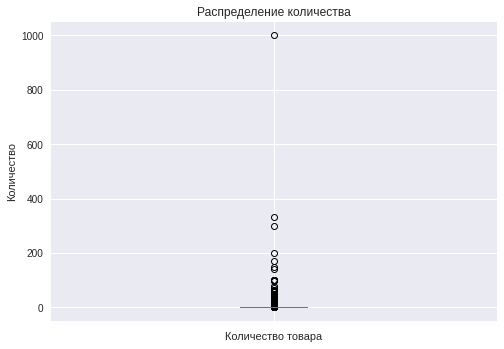

In [23]:
# Построение графика boxplot
ax = data.boxplot(column=['quantity'])

# Убираем название столбца, задавая пустую метку на соответствующей позиции
ax.set_xticks([1])  # Устанавливаем позицию тика
ax.set_xticklabels([''])  # Устанавливаем пустую метку

# Добавляем заголовок и подписи осей
plt.title("Распределение количества")
plt.xlabel("Количество товара")
plt.ylabel("Количество")

# Показываем график
plt.show()

Из графика видно, что в основном в заказы добавляют только один товар с одним и тем же названием. Однако иногда количество товаров может быть больше.

Проверим, есть ли выбросы по чеку покупки.

In [24]:
# Введем новый столбец, который будет отображать общую стоимость товаров в заказе с учетом их количества
data.loc[:, 'total'] = data['quantity'] * data['price']

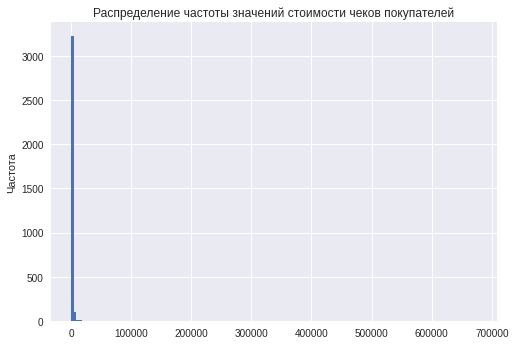

count      3349.000000
mean       1316.329775
std       11829.400913
min           9.000000
25%         187.500000
50%         569.000000
75%        1247.000000
max      675000.000000
Name: total, dtype: float64

In [25]:
# Получим представление о распределении
ax = data.groupby('order_id')['total'].sum().plot(kind='hist',title='Распределение частоты значений стоимости чеков покупателей', bins=150)
ax.set_ylabel('Частота')
plt.show();
data.groupby('order_id')['total'].sum().describe()

In [26]:
# Введем новый столбец, который будет отображать общую стоимость товаров в заказе с учетом их количества
data.loc[:, 'total'] = data['quantity'] * data['price']

# Вычисляем сумму 'total' по каждому 'order_id'
data['total_sum'] = data.groupby('order_id')['total'].transform('sum')

# Устанавливаем верхнюю границу для выбросов по 99-му процентилю
upper_bound = data['total_sum'].quantile(0.99)

# Находим выбросы
outliers = data[data['total_sum'] > upper_bound]

# Выводим информацию о выбросах
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 98 to 7436
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         52 non-null     datetime64[ns]
 1   customer_id  52 non-null     object        
 2   order_id     52 non-null     int64         
 3   product      52 non-null     object        
 4   quantity     52 non-null     int64         
 5   price        52 non-null     float64       
 6   time         52 non-null     datetime64[ns]
 7   total        52 non-null     float64       
 8   total_sum    52 non-null     float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 4.1+ KB


In [27]:
outliers

,date,customer_id,order_id,product,quantity,price,time,total,total_sum
98,2018-10-04,d1a13243-9111-454f-848c-dcce0958528c,68529,Сумка-тележка хозяйственная Andersen Scala Sho...,1,5024.0,2018-10-04 17:00:00,5024.0,8758.0
99,2018-10-04,d1a13243-9111-454f-848c-dcce0958528c,68529,Сумка-тележка хозяйственная Rolser Jet Cuadro ...,1,3734.0,2018-10-04 17:00:00,3734.0,8758.0
144,2018-10-08,9151d307-654c-4239-a888-ada5ca45f0b2,68571,Набор вешалок для костюма 45см 4шт цвет: кремо...,37,202.0,2018-10-08 15:00:00,7474.0,7474.0
375,2018-10-23,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68727,"Веник сорго с деревянной ручкой с 4-мя швами, ...",17,530.0,2018-10-23 11:00:00,9010.0,9010.0
568,2018-11-01,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0,2018-11-01 08:00:00,8670.0,8670.0
586,2018-11-02,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,Муляж ЯБЛОКО 9 см красное,140,59.0,2018-11-02 11:00:00,8260.0,8260.0
654,2018-11-05,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,Сумка-тележка хозяйственная Rolser MOU041 malv...,1,7597.0,2018-11-05 22:00:00,7597.0,7597.0
661,2018-11-06,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"Урна уличная ""Гео"", Hobbyka/Хоббика, 59*37,5см...",5,4874.0,2018-11-06 12:00:00,24370.0,24370.0
693,2018-11-07,6ae61023-9d87-4ff3-a02e-b42eab150140,68908,Коврик придверный Attribute NATURE кокосовый 6...,27,286.0,2018-11-07 19:00:00,7722.0,7722.0
999,2018-11-27,7d8528bb-623e-477f-a059-efc312b62d29,69127,Вешалка деревянная с расширенными плечиками и ...,12,263.0,2018-11-27 15:00:00,3156.0,9915.0


In [28]:
upper_bound

7378.250000000025

Аномальным заказом можно считать заказ № 5456 от 18.06.2019, в котором было приобретено 1000 штук вантузов с деревянными

- Необычайно большое количество: покупка 1000 штук одного товара (вантузов) является аномальной и не характерна для большинства заказов в этом наборе данных.
- Высокая общая стоимость: сумма заказа составляет 675 000 рублей, что значительно превышает суммы других заказов, даже с учётом высокой стоимости отдельных товаров.
- Этот заказ следует удалить, так как он может быть ошибкой в данных (например, случайное указание количества) или необычной транзакцией, не отражающей повседневные покупки.

In [29]:
data[data['order_id'] == 71743]

,date,customer_id,order_id,product,quantity,price,time,total,total_sum
5456,2019-06-18,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,2019-06-18 15:00:00,675000.0,675000.0


Мы убедились, что в этом заказе нет других товаров, кроме тех, что были обнаружены. Теперь мы удалим этот заказ.

In [30]:
data = data[data['order_id'] != 71743]

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5161 entries, 0 to 7473
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5161 non-null   datetime64[ns]
 1   customer_id  5161 non-null   object        
 2   order_id     5161 non-null   int64         
 3   product      5161 non-null   object        
 4   quantity     5161 non-null   int64         
 5   price        5161 non-null   float64       
 6   time         5161 non-null   datetime64[ns]
 7   total        5161 non-null   float64       
 8   total_sum    5161 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 403.2+ KB


После удаления аномального заказа мы имеем 69% от исходного объёма информации.

### Столбец с названиями категорий

Теперь разделим товары на категории. Для этого мы составим список ключевых слов, которые встречаются в названиях товаров, и распределим их по соответствующим тематическим группам.

In [32]:
print(data['product'].nunique())
data['product'].unique()

2237


array(['Комнатное растение в горшке Алое Вера, d12, h30',
       'Комнатное растение в горшке Кофе Арабика, d12, h25',
       'Радермахера d-12 см h-20 см', ...,
       'Арбуз Сибирские огни раннеспелый d-7 см',
       'Наматрасник Wellness WM180, 100% хлопок, 180х200 см, стеганый белый, 4607101067749',
       'Цинерания рассада однолетних цветов в кассете по 10 шт'],
      dtype=object)

Чтобы определить категории товаров, нам потребовалось тщательно изучить содержимое таблицы, многократно выводя значения из столбца «product». В процессе этого выписываись ключевые слова, встречающиеся в названиях продуктов.

Постепенно появиось понимание, на какие категории можно разделить товары по смыслу. Для каждой категории был создан список, который постепенно заполнялся ключевыми словами. Чтобы при повторном выводе значений из столбца «product» не сталкиваться с уже классифицированными товарами, исключали их из таблицы. В результате в таблице остались только товары категории «растения и семена».

Поскольку в таблице содержится большое количество растений и семян, было решено объединить их в одну категорию, чтобы не перечислять все ключевые слова. Таким образом, все оставшиеся товары были отнесены к этой категории. В итоге у нас получилось 5 категорий товаров.

In [33]:
kitchen = ['термокружка', 'вилка', 'ложка', 'контейнер', 'нож', 'кувшин', 'салфет', 'овоще', 'чайник',
           'просеиватель', 'кухон', 'банка', 'стакан', 'кастрюля', 'чайный', 'кружка', 'сковород', 'тарелка',
           'противень', 'дуршлаг', 'бидон', 'термос', 'рыбочистка', 'толкушка', 'лопатка', 'скатерть', 'ковш',
           'холодца', 'выпечк', 'пресс', 'разделочная', 'пьезозажигалка', 'миксер', 'посуды', 'масленка',
           'мантоварка', 'антижир', 'картофелемялка', 'миска', 'блюдце', 'хлебница', 'блюдо', 'сахарница',
           'терка', 'крышка', 'яйца', 'половник', 'подушка', 'посудомоечных', 'рассекатель', 'фужеров',
           'кексов', 'столовых', 'орехоколка', 'бокалов', 'кружек', 'сито', 'скалка', 'отделитель', 'соко',
           'кондитерский', 'пищев', 'сотейник', 'котел', 'тортница', 'электроштопор', 'салатник']

household_goods = ['сушилка', 'корыто', 'щетка', 'щётка', 'веник', 'ведро', 'пылесос', 'микрофибр', 'швабра', 'налета',
                   'прищеп', 'гладильн', 'подрукавник', 'глажения', 'досок', 'корзина', 'насадка', 'ролика', 'мытья',
                   'губка', 'утюг', 'подкладка', 'перчатки', 'тряпкодержатель', 'окномойка', 'отжим', 'стирки',
                   'отбеливатель', 'совок', 'засоров', 'стиральн', 'пластмассов', 'сметка', 'алюминиев', 'чистк',
                   'чистящ', 'белья', 'сиденье', 'ёрш', 'ерш', 'ванн', 'полотен', 'зубная', 'вантуз', 'мыло', 'фен', 
                   'дозатор', 'халат', 'подголовник', 'маска']

furniture = ['коврик', 'обув', 'вешал', 'полки', 'комод', 'простын', 'покрывало', 'костюм', 'ящик', 'кашпо',
             'фоторамка', 'ковер', 'ковёр', 'плед', 'напольные', 'пуф', 'кофр', 'одежды', 'штор', 'плечики',
             'пододеяльник', 'наматрицник', 'наматрасник', 'одеяло', 'наволочка', 'светильник', 'мебел', 'коробка',
             'подставка', 'лоток', 'корзинка', 'ключница', 'урна', 'постельн', 'хранения', 'тележк', 'сумка',
             'муляж', 'искусственн', 'искуственн']

instruments = ['болт', 'крючок', 'стремянк', 'фал ', 'шпагат', 'полировки', 'петля', 'скребок', 'пробки', 'крепеж',
               'инструмент', 'шнур', 'сварка', 'бензин', 'пружина', 'напильников', 'скоба', 'сверел', 'строительн',
               'сверло', 'термометр', 'вентиляц', 'короб ', 'линейка', 'угольник', 'уголок', 'фиксатор']

In [34]:
def to_category(product_name):
    """ С помощью этой функции все товары будут разделены на категории """
    if any(i in product_name.lower() for i in household_goods):
        return 'товары для дома'
    elif any(i in product_name.lower() for i in kitchen):
        return 'товары для кухни'
    elif any(i in product_name.lower() for i in furniture):
        return 'предметы интерьера'
    elif any(i in product_name.lower() for i in instruments):
        return 'строительные инструменты'
    else:
        return 'растения и семена'

In [35]:
# Используя функцию, создадим новый столбец, в котором будут указаны категории товаров
data['product_category'] = data['product'].apply(to_category)

In [36]:
# Давайте посмотрим, сколько товаров в каждой категории
categories_amount = (
    data.groupby(['product', 'product_category'])[['order_id']].nunique().reset_index()
    .groupby('product_category', as_index=False)['product'].count().sort_values('product', ascending=False)
)
categories_amount

,product_category,product
1,растения и семена,863
3,товары для дома,589
0,предметы интерьера,444
4,товары для кухни,282
2,строительные инструменты,59


В процессе предварительной обработки данных были удалены аномальные и дублирующиеся элементы из датасета. К аномальным относились заказы с высокой ценой и большим количеством товаров в одном заказе. Дубликаты представляли собой одинаковые заказы с различным временем оформления и заказы, в которых у разных пользователей одинаковый номер заказа. Также был создан новый столбец, в котором указывается категория продаваемого заказа. 

Теперь давайте приступим к анализу данных.

## Анализ данных

* Как меняется средняя выручка с покупателя по месяцам?
* Когда чаще всего покупают: утром, днём, вечером или ночью?

### Покупки пользователей

Узнаем общее количество приобретённых товаров в разрезе категории товара и динамику их роста. Для начала создадим столбик с месяцем заказа.

In [37]:
data['month_date'] = data['time'].dt.to_period("M")

In [38]:
# Узнаем общее количество приобретённых товаров
total_purchased_quantity = data['quantity'].sum()

# Выводим результат
print(f"Общее число купленных товаров: {total_purchased_quantity}")

Общее число купленных товаров: 12325


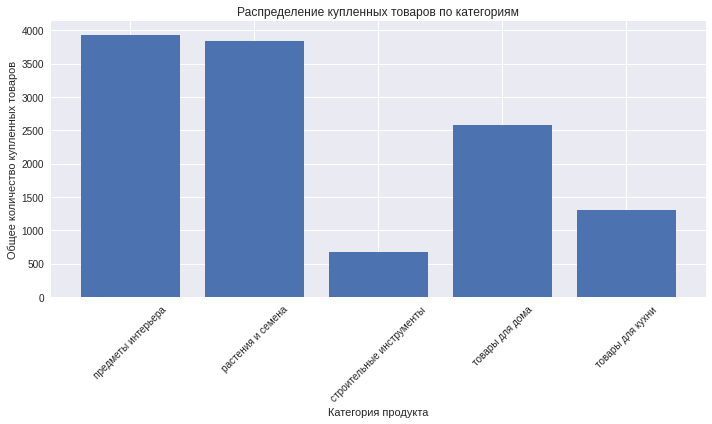

In [39]:
# Группируем по product_category и суммируем quantity
total_quantity_per_category = data.groupby('product_category')['quantity'].sum().reset_index()
# Визуализация распределения по категориям
plt.figure(figsize=(10, 6))
plt.bar(total_quantity_per_category['product_category'], total_quantity_per_category['quantity'])
plt.xlabel('Категория продукта')
plt.ylabel('Общее количество купленных товаров')
plt.title('Распределение купленных товаров по категориям')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
total_quantity_per_category['%'] = (total_quantity_per_category['quantity']/total_purchased_quantity*100).round()
total_quantity_per_category.sort_values(by='quantity', ascending=False)

,product_category,quantity,%
0,предметы интерьера,3935,32.0
1,растения и семена,3838,31.0
3,товары для дома,2580,21.0
4,товары для кухни,1298,11.0
2,строительные инструменты,674,5.0


Всего было куплено 12325 товара. Чаще всего покупатели выбирают предметы интерьера — 32 процентов(3935). Реже приобретают растения и семена и товары для дома: 31 и 21 процентов соответственно. Строительные инструменты пользуются наименьшим спросом — их покупают всего лишь 5 процента от общего количества купленных товаров.

In [41]:
# Составим сводную таблицу, в которой будем группировать данные по месяцам заказа и категориям товаров.
order_date = data.groupby(['month_date', 'product_category'])['quantity'].sum().reset_index()
order_date

,month_date,product_category,quantity
0,2018-10,предметы интерьера,338
1,2018-10,растения и семена,145
2,2018-10,строительные инструменты,257
3,2018-10,товары для дома,369
4,2018-10,товары для кухни,100
...,...,...,...
75,2020-01,предметы интерьера,49
76,2020-01,растения и семена,124
77,2020-01,строительные инструменты,10
78,2020-01,товары для дома,74


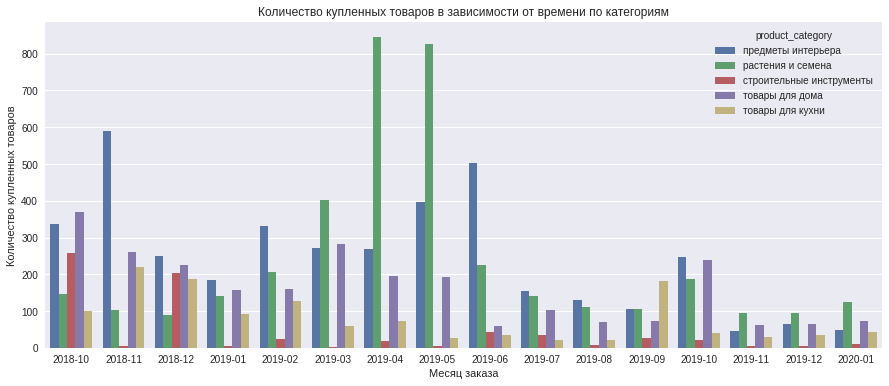

In [42]:
# Построение столбчатой диаграммы
plt.figure(figsize=(15, 6))
sns.barplot(x='month_date', y='quantity', hue='product_category', data=order_date)
plt.title('Количество купленных товаров в зависимости от времени по категориям')
plt.xlabel('Месяц заказа')
plt.ylabel('Количество купленных товаров')
plt.show()

Проанализировав количество купленных товаров по месяцам и разбив их на категории товаров, можно сделать выводы о сезонности и изменениях спроса на различные категории в течение года.

* Во второй половине исследуемого периода наблюдается снижение спроса на предметы интерьера. Несмотря на общую тенденцию, можно выделить несколько месяцев, когда предметы интерьера покупали особенно активно: июнь, май и ноябрь.
* Товары из категории «растения и семена» пользовались предсказуемым сезонным спросом. Наибольший интерес к ним проявлялся в период с апреле по май.
* Строительные инструменты лучше всего продавались в октябре и июле.
* В целом, наблюдается снижение спроса на товары для дома. Если рассмотреть данные за вторую половину периода, то они выглядят довольно стабильно. Если выделить конкретные месяцы второй половины, то это октябрь, декабрь и июнь.  
* Наибольший спрос на товары для кухни наблюдается в сентябре, ноябре и декабре.


### Средний чек
Каков средний чек пользователей и его динамика?

In [43]:
# Рассчитаем средний чек, учитывая все заказы
print('Средний чек:' ,(data['total'].sum()/data['order_id'].nunique()).round())

Средний чек: 1115.0


Давайте посмотрим, как менялся средний чек заказов по месяцам.

In [44]:
data_check = data.groupby(['month_date', 'order_id'])['total'].sum().reset_index()

In [45]:
data_avg_check = ((data_check.groupby(['month_date'])['total'].sum())/(
    data_check.groupby(['month_date'])['order_id'].nunique())).reset_index()
data_avg_check.columns = ['month_date', 'средний чек'] # меняем название колонки для улучшения восприятия

,month_date,средний чек
0,2018-10,1361.676724
1,2018-11,1815.438776
2,2018-12,1260.250936
3,2019-01,1434.405229
4,2019-02,1084.367647
5,2019-03,1035.478070
6,2019-04,1199.979839
7,2019-05,1294.017964
8,2019-06,1436.567568
9,2019-07,1156.951087


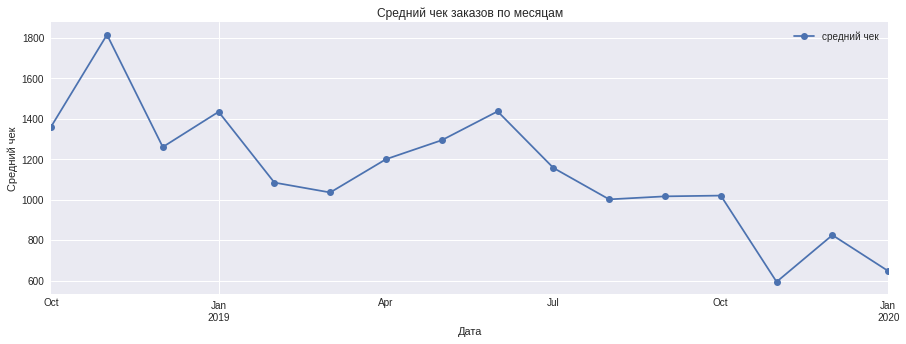

In [46]:
data_avg_check.plot(x="month_date", y="средний чек", style='o-', grid=True, figsize=(15, 5),\
                    title='Средний чек заказов по месяцам',\
                    xlabel = 'Дата', ylabel = 'Средний чек');
data_avg_check

Средний чек заказов в исследуемый период значительно снизился.

### Количество заказов

Давайте проследим за изменениями в количестве заказов.

month_date
2018-10    232
2018-11    196
2018-12    267
2019-01    153
2019-02    272
2019-03    228
2019-04    248
2019-05    167
2019-06    148
2019-07    184
2019-08    166
2019-09    170
2019-10    187
2019-11    217
2019-12    246
2020-01    269
Freq: M, Name: order_id, dtype: int64

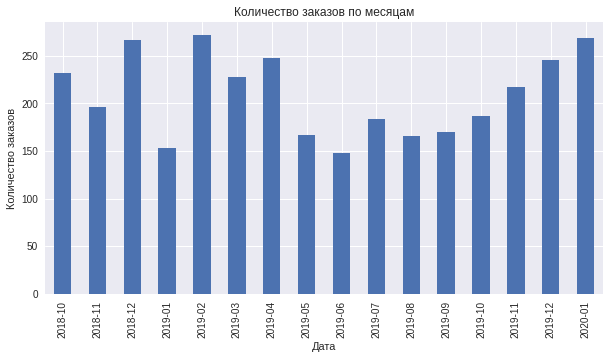

In [47]:
data.groupby(['month_date'])['order_id'].nunique().plot(
    kind="bar", grid=True, figsize=(10, 5), title='Количество заказов по месяцам',\
    xlabel = 'Дата', ylabel = 'Количество заказов');
data_check.groupby(['month_date'])['order_id'].nunique()

После того как количество заказов снизилось, наблюдается тенденция к устойчивому росту.

### Динамика выручки
Давайте посмотрим на динамику выручки по месяцам.

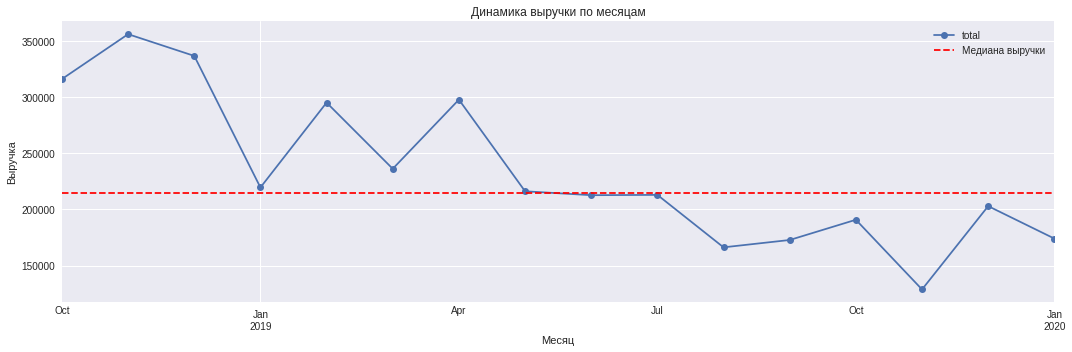

,month_date,total
0,2018-10,315909.000000
1,2018-11,355826.000000
2,2018-12,336487.000000
3,2019-01,219464.000000
4,2019-02,294948.000000
5,2019-03,236089.000000
6,2019-04,297595.000000
7,2019-05,216101.000000
8,2019-06,212612.000000
9,2019-07,212879.000000


In [48]:
revenue_per_month = data.groupby('month_date')['total'].sum().reset_index()
median_revenue = revenue_per_month['total'].median()

# Создаём график
ax = revenue_per_month.plot(x="month_date", y="total", style='o-', grid=True, figsize=(15, 5),
                             title='Динамика выручки по месяцам',
                             xlabel='Месяц', ylabel='Выручка')

# Добавляем линию медианного значения
ax.axhline(y=median_revenue, color='r', linestyle='--', label='Медиана выручки')

# Добавляем легенду
ax.legend()

# Показать график
plt.tight_layout()
plt.show()
revenue_per_month

In [49]:
revenue_per_month['total'].describe()

count        16.000000
mean     233336.776042
std       66877.585385
min      128791.750000
25%      186579.083333
50%      214490.000000
75%      295609.750000
max      355826.000000
Name: total, dtype: float64

Выручка варьировалась в пределах от 128791.75 в ноябре 2019 года до 355826 в ноябре 2018 года. Можно заметить ярко выраженные сезонные изменения, особенно в праздничные периоды. Начиная с июня 2019 года, выручка стала снижаться и оказалась ниже среднего значения.

### Помесячная динамика средней выручки с покупателя

In [50]:
# сгруппируем данные по месяцам, а затем вычислить среднюю выручку с покупателя для каждого месяца
monthly_avg_revenue = data.groupby('month_date').apply(
    lambda x: x['total'].sum() / x['customer_id'].nunique()
).reset_index(name='avg_revenue')

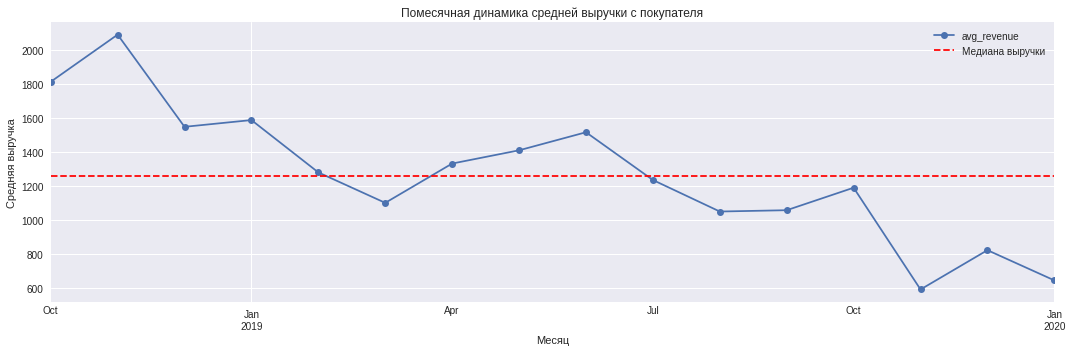

,month_date,avg_revenue
0,2018-10,1815.568966
1,2018-11,2093.094118
2,2018-12,1550.631336
3,2019-01,1590.318841
4,2019-02,1282.382609
5,2019-03,1103.219626
6,2019-04,1334.506726
7,2019-05,1412.424837
8,2019-06,1518.657143
9,2019-07,1237.668605


In [51]:
median_avg = monthly_avg_revenue['avg_revenue'].median()

# Создаём график
ax = monthly_avg_revenue.plot(x="month_date", y="avg_revenue", style='o-', grid=True, figsize=(15, 5),
                             title='Помесячная динамика средней выручки с покупателя',
                             xlabel='Месяц', ylabel='Средняя выручка')

# Добавляем линию медианного значения
ax.axhline(y=median_avg, color='r', linestyle='--', label='Медиана выручки')

# Добавляем легенду
ax.legend()

# Показать график
plt.tight_layout()
plt.show()
monthly_avg_revenue

Средняя выручка с покупателя демонстрирует общую тенденцию к снижению. Максимум выручки (2093) в ноябре 2018. Наименьшая выручка (593) в ноябре 2019.

Результаты анализа данных позволяют сделать несколько важных выводов:

Всего было куплено 12325 товара. Чаще всего покупатели выбирают предметы интерьера — 32 процентов(3935). Реже приобретают растения и семена и товары для дома: 31 и 21 процентов соответственно. Строительные инструменты пользуются наименьшим спросом — их покупают всего лишь 5 процента от общего количества купленных товаров.

Проанализировав количество купленных товаров по месяцам и разбив их на категории товаров, можно сделать выводы о сезонности и изменениях спроса на различные категории в течение года.

* Во второй половине исследуемого периода наблюдается снижение спроса на предметы интерьера. Несмотря на общую тенденцию, можно выделить несколько месяцев, когда предметы интерьера покупали особенно активно: июнь, май и ноябрь.
* Товары из категории «растения и семена» пользовались предсказуемым сезонным спросом. Наибольший интерес к ним проявлялся в период с апреле по май.
* Строительные инструменты лучше всего продавались в октябре и июле.
* В целом, наблюдается снижение спроса на товары для дома. Если рассмотреть данные за вторую половину периода, то они выглядят довольно стабильно. Если выделить конкретные месяцы второй половины, то это октябрь, декабрь и июнь.  
* Наибольший спрос на товары для кухни наблюдается в сентябре, ноябре и декабре.

Средний чек заказов за исследуемый период значительно снизился.

После большого спада в середине периода наблюдается тенденция к устойчивому росту количества заказов ежемесячно.

Выручка варьировалась в пределах от 128791.75 в ноябре 2019 года до 355826 в ноябре 2018 года. Можно заметить ярко выраженные сезонные изменения, особенно в праздничные периоды. Начиная с июня 2019 года, выручка стала снижаться и оказалась ниже среднего значения.

## Сегментирование покупателей

### RFM-анализ

Проведем RFM-анализ, чтобы разделить наших покупателей на три категории:
* постоянные клиенты;
* неактивные клиенты;
* ушедшие клиенты.

Создадим таблицу RFM. В нашей базе данных последний заказ был сделан 31 января 2020 года. Чтобы рассчитать дату давности, мы использовали значение функции NOW, которая возвращает текущую дату плюс один день от указанной даты.

In [52]:
data['date'].max() + timedelta(days=1)

Timestamp('2020-02-01 00:00:00')

In [53]:
NOW = dt.datetime(2020, 2, 1)
# таблица RFM
RFM_table=data.groupby('customer_id').agg({'time': lambda x: (NOW - x.max()).days, # Дата последнего заказа
                                                'order_id': lambda x: len(x.unique()), # Частота заказа
                                                'total': lambda x: x.sum()})  # Общая сумма покупок пользователя

RFM_table['time'] = RFM_table['time'].astype(int)

RFM_table.rename(columns={'time': 'recency', 
                         'order_id': 'frequency',
                         'total': 'monetary_value'}, inplace=True)
RFM_table.head()

,recency,frequency,monetary_value
customer_id,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0
001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0


Давайте рассмотрим показатель RFM. Для его расчета мы воспользуемся квинтилями — разделим доступные данные на три части. Это позволит нам точно определить значение RFM.

In [54]:
quantiles = RFM_table.quantile(q=[0.33,0.66])
quantiles

,recency,frequency,monetary_value
0.33,94.4,1.0,524.0
0.66,292.0,2.0,1347.8


In [55]:
# Преобразование квантилей в словарь, что делает его более удобным в использовании.
quantiles = quantiles.to_dict()
##  Сегментация RFM
RFM_segment = RFM_table.copy()

def R_Class(x,p,d):
    '''Аргументы (x = value, p = recency, monetary_value, frequency, k = quartiles dict)'''
    if x <= d[p][0.33]:
        return 3
    elif x <= d[p][0.66]:
        return 2
    else:
        return 1
    
def FM_Class(x,p,d):
    '''Аргументы (x = value, p = recency, monetary_value, frequency, k = quartiles dict)'''
    if x <= d[p][0.33]:
        return 1
    elif x <= d[p][0.66]:
        return 2
    else:
        return 3

RFM_segment['R_Quartile'] = RFM_segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_segment['F_Quartile'] = RFM_segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_segment['M_Quartile'] = RFM_segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))
RFM_segment['RFMClass'] = RFM_segment.R_Quartile.map(str) \
                            + RFM_segment.F_Quartile.map(str) \
                            + RFM_segment.M_Quartile.map(str)

In [56]:
RFM_segment

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0,2,1,2,212
001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0,1,1,1,111
00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0,2,1,2,212
002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0,1,1,3,113
003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0,2,1,3,213
...,...,...,...,...,...,...,...
ff0c73c3-6b62-4e67-8e12-bb83ed1851d5,93,1,899.0,3,1,2,312
ff422162-fc4a-4b65-a0e2-17f5095ea2c6,326,3,1610.0,1,3,3,133
ff601403-b094-4b86-9ac6-264d725b9277,12,2,1739.0,3,2,3,323


Разделим пользователей на 3 категории (постоянные клиенты, неактивные клиенты, ушедшие клиенты).

In [57]:
def categorize_customer(row):
    try:
        if row <= 1:
            return 'ушедшие'
        elif row <= 2:
            return 'неактивные'
        elif row <= 3:
            return 'постоянные'
    except:
        return 'нет категории'

In [58]:
RFM_segment['categorize_customer'] = RFM_segment['R_Quartile'].apply(categorize_customer)

In [59]:
RFM_segment.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,categorize_customer
customer_id,,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0,2,1,2,212,неактивные
001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0,1,1,1,111,ушедшие
00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0,2,1,2,212,неактивные
002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0,1,1,3,113,ушедшие
003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0,2,1,3,213,неактивные


In [60]:
# Добавим данные в основную таблицу
data = data.merge(RFM_segment['categorize_customer'], on='customer_id', how='left')
data.head()

,date,customer_id,order_id,product,quantity,price,time,total,total_sum,product_category,month_date,categorize_customer
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,142.0,1037.0,растения и семена,2018-10,ушедшие
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,194.0,1037.0,растения и семена,2018-10,ушедшие
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,112.0,1037.0,растения и семена,2018-10,ушедшие
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,179.0,1037.0,растения и семена,2018-10,ушедшие
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,112.0,1037.0,растения и семена,2018-10,ушедшие


categorize_customer
ушедшие       774
неактивные    754
постоянные    753
Name: customer_id, dtype: int64

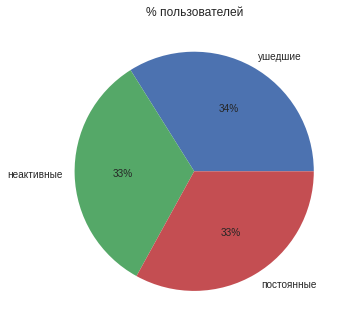

In [61]:
# Посмотрим их распределение по категориям
data.groupby('categorize_customer')['customer_id'].nunique().sort_values(ascending=False).plot(
    kind='pie', title="% пользователей", xlabel=" ", ylabel=" ", autopct='%1.0f%%');
data.groupby('categorize_customer')['customer_id'].nunique().sort_values(ascending=False)

Категории покупателей представлены в равной степени.

### Анализ покупателей

Давайте посмотрим, что покупают разные категории клиентов.

In [62]:
customer_date = data.groupby(['categorize_customer', 'product_category']).agg({'product':'count'}).reset_index()
customer_date

,categorize_customer,product_category,product
0,неактивные,предметы интерьера,257
1,неактивные,растения и семена,1367
2,неактивные,строительные инструменты,26
3,неактивные,товары для дома,229
4,неактивные,товары для кухни,65
5,постоянные,предметы интерьера,351
6,постоянные,растения и семена,440
7,постоянные,строительные инструменты,35
8,постоянные,товары для дома,495
9,постоянные,товары для кухни,173


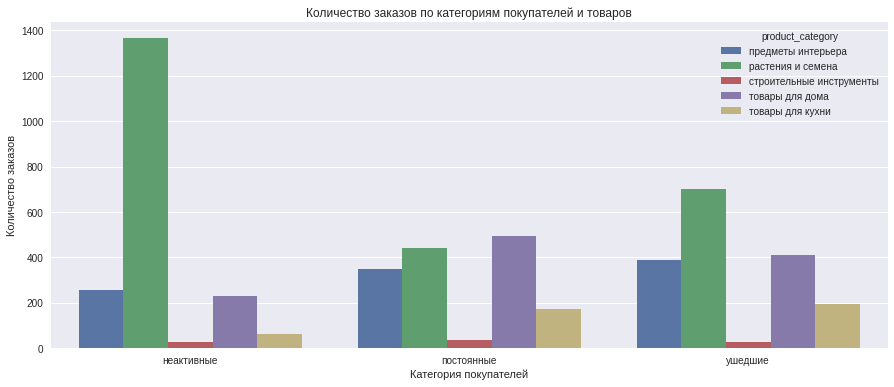

In [63]:
# Построение столбчатой диаграммы
plt.figure(figsize=(15, 6))
sns.barplot(x='categorize_customer', y='product', hue='product_category', data=customer_date)
plt.title('Количество заказов по категориям покупателей и товаров')
plt.xlabel('Категория покупателей')
plt.ylabel('Количество заказов')
plt.show()

У постоянных покупателей, которые недавно совершали покупки, самые высокие показатели по товарам для дома и самые низкие — по растениям и семенам.

Неактивные покупатели чаще других приобретали растения и семена, но реже остальных пользовались строительными инструментами.

Ушедшие покупатели чаще других покупали предметы интерьера и товары для кухни.

In [64]:
data.head()

,date,customer_id,order_id,product,quantity,price,time,total,total_sum,product_category,month_date,categorize_customer
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,142.0,1037.0,растения и семена,2018-10,ушедшие
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,194.0,1037.0,растения и семена,2018-10,ушедшие
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,112.0,1037.0,растения и семена,2018-10,ушедшие
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,179.0,1037.0,растения и семена,2018-10,ушедшие
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,112.0,1037.0,растения и семена,2018-10,ушедшие


### Анализа сегментов
Напишим функцию для анализа сегментов по столбцу categorize_customer. Она рассчитает: количество покупателей, средний чек, основные продукты и категории.

In [65]:
def analyze_customer_segments(df):
    '''
    Функция принимает DataFrame с указанными столбцами и возвращает DataFrame с результатами анализа для каждого сегмента,
    включая месяцы с пиковым спросом на топ категории товаров.
    '''
    # Группировка по сегментам покупателей
    segment_analysis = df.groupby('categorize_customer').apply(lambda segment: pd.Series({
        'Количество покупателей': segment['customer_id'].nunique(),
        'Средний чек': segment.groupby('order_id')['total'].sum().mean(),
        'Основные продукты': ', '.join(segment['product'].value_counts().nlargest(3).index),
        'Основные категории': ', '.join(segment['product_category'].value_counts().nlargest(3).index),
        
        # Определение пиковых месяцев для топ категорий
        'Пики спроса на категории': segment.groupby(['product_category', 'month_date'])['quantity'].sum()
            .unstack(fill_value=0).apply(lambda x: x.idxmax(), axis=1)
            .to_dict()
    })).reset_index()
    
    return segment_analysis

In [66]:
segment_results = analyze_customer_segments(data)
pd.options.display.max_colwidth = None
segment_results

,categorize_customer,Количество покупателей,Средний чек,Основные продукты,Основные категории,Пики спроса на категории
0,неактивные,754,1223.202339,"Пеларгония розебудная Prins Nikolai укорененный черенок, Пеларгония зональная диам. 12 см сиреневый полумахровый, Пеларгония розебудная Mary укорененный черенок","растения и семена, предметы интерьера, товары для дома","{'предметы интерьера': 2019-06, 'растения и семена': 2019-05, 'строительные инструменты': 2019-06, 'товары для дома': 2019-10, 'товары для кухни': 2019-09}"
1,постоянные,753,866.739235,"Пеларгония розебудная Red Pandora укорененный черенок, Тележка багажная DELTA ТБР-20 синий грузоподъемность 25 кг сумка и 50 кг каркас РОССИЯ, Пеларгония зональная Ринго Вайт d-7 см h-10 см укорененный черенок","товары для дома, растения и семена, предметы интерьера","{'предметы интерьера': 2019-12, 'растения и семена': 2020-01, 'строительные инструменты': 2020-01, 'товары для дома': 2020-01, 'товары для кухни': 2020-01}"
2,ушедшие,774,1394.036036,"Пеларгония зональная диам. 12 см сиреневый полумахровый, Сумка-тележка 2-х колесная Gimi Argo синяя, Пеларгония розебудная Red Pandora укорененный черенок","растения и семена, товары для дома, предметы интерьера","{'предметы интерьера': 2018-11, 'растения и семена': 2019-03, 'строительные инструменты': 2018-10, 'товары для дома': 2018-10, 'товары для кухни': 2018-11}"


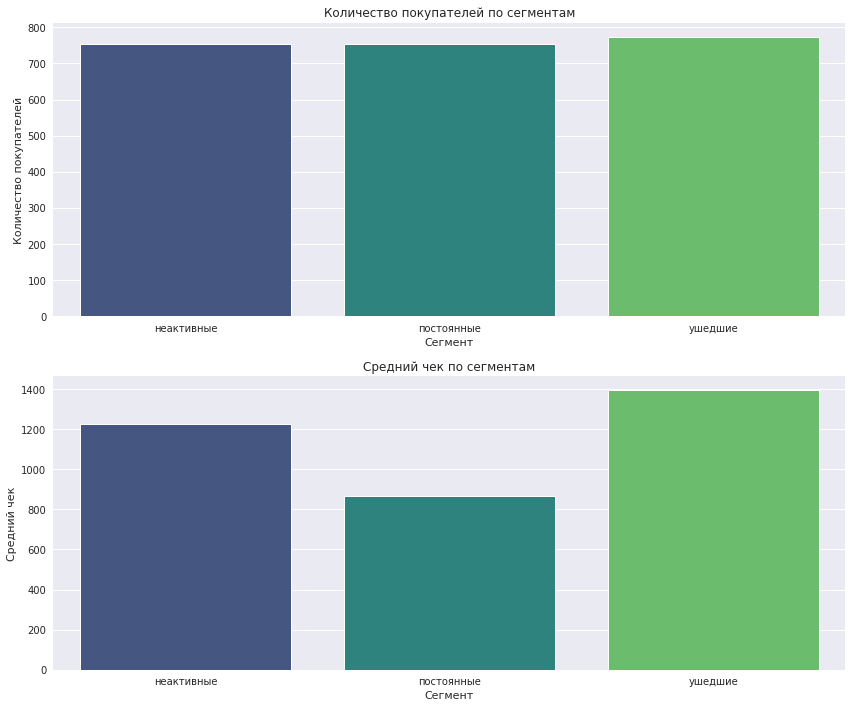

Основные продукты и категории по сегментам:

Сегмент: неактивные
  Топ-3 продукты: Пеларгония розебудная Prins Nikolai укорененный черенок, Пеларгония зональная диам. 12 см сиреневый полумахровый, Пеларгония розебудная Mary укорененный черенок
  Топ-3 категории: растения и семена, предметы интерьера, товары для дома

----------------------------------------

Сегмент: постоянные
  Топ-3 продукты: Пеларгония розебудная Red Pandora укорененный черенок, Тележка багажная DELTA ТБР-20 синий грузоподъемность 25 кг сумка и 50 кг каркас РОССИЯ, Пеларгония зональная Ринго Вайт d-7 см h-10 см укорененный черенок
  Топ-3 категории: товары для дома, растения и семена, предметы интерьера

----------------------------------------

Сегмент: ушедшие
  Топ-3 продукты: Пеларгония зональная диам. 12 см сиреневый полумахровый, Сумка-тележка 2-х колесная Gimi Argo синяя, Пеларгония розебудная Red Pandora укорененный черенок
  Топ-3 категории: растения и семена, товары для дома, предметы интерьера

---------

In [67]:
def visualize_customer_segments(segment_data):
    # Создаем графики количества покупателей и среднего чека
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    sns.set(style="whitegrid")

    # Подграфик 1: Количество покупателей по сегментам
    sns.barplot(x='categorize_customer', y='Количество покупателей', data=segment_data, palette='viridis', ax=axes[0])
    axes[0].set_title('Количество покупателей по сегментам')
    axes[0].set_xlabel('Сегмент')
    axes[0].set_ylabel('Количество покупателей')

    # Подграфик 2: Средний чек по сегментам
    sns.barplot(x='categorize_customer', y='Средний чек', data=segment_data, palette='viridis', ax=axes[1])
    axes[1].set_title('Средний чек по сегментам')
    axes[1].set_xlabel('Сегмент')
    axes[1].set_ylabel('Средний чек')

    plt.tight_layout()
    plt.show()

    # Отдельный вывод таблицы с основными продуктами и категориями
    print("Основные продукты и категории по сегментам:\n")
    for index, row in segment_data.iterrows():
        print(f"Сегмент: {row['categorize_customer']}")
        print(f"  Топ-3 продукты: {row['Основные продукты']}")
        print(f"  Топ-3 категории: {row['Основные категории']}")
        print("\n" + "-"*40 + "\n")

segment_results = analyze_customer_segments(data)
visualize_customer_segments(segment_results)

Анализ сегментов показывает различия в типах покупок и средней стоимости по каждому из них. Постоянные клиенты делают частые, небольшие покупки, что стабильно поддерживает их лояльность. Неактивные клиенты склонны к периодическим, но более затратным покупкам, и их интересы в основном связаны с украшением дома. Ушедшие клиенты, напротив, склонны к крупным разовым покупкам, вероятно, не планируя долгосрочных покупок.

### Анализа сезонности по категориям товаров

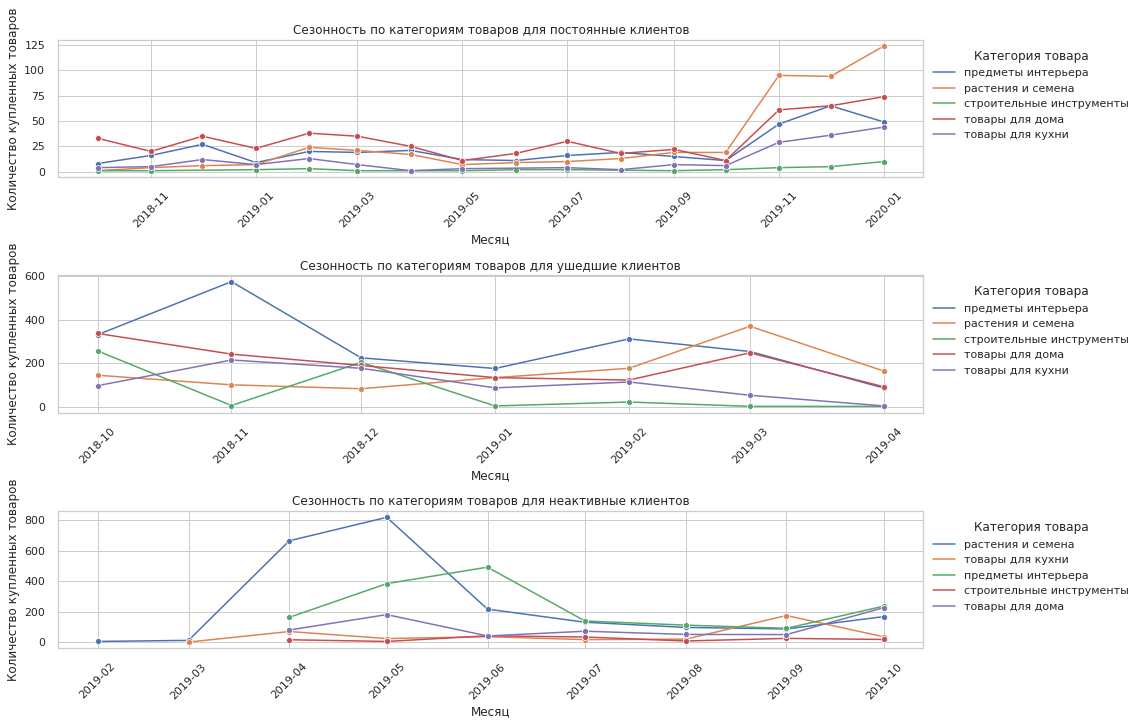

In [68]:
# Группировка данных по месяцам и категориям продуктов
grouped = data.groupby(['month_date', 'categorize_customer', 'product_category'])['quantity'].sum().reset_index()

# Преобразуем 'month_date' в Timestamp, если это Period
if grouped['month_date'].dtype == 'object':
    grouped['month_date'] = pd.to_datetime(grouped['month_date'], format='%Y-%m')
else:
    grouped['month_date'] = grouped['month_date'].dt.to_timestamp()

# Построение графиков
plt.figure(figsize=(16, 10))  # Увеличиваем ширину графиков
sns.set(style="whitegrid")

# Используем уникальные категории клиентов для создания графиков
for category in grouped['categorize_customer'].unique():
    subset = grouped[grouped['categorize_customer'] == category]

    plt.subplot(len(grouped['categorize_customer'].unique()), 1, list(grouped['categorize_customer'].unique()).index(category) + 1)
    sns.lineplot(data=subset, x='month_date', y='quantity', hue='product_category', marker='o')

    plt.title(f'Сезонность по категориям товаров для {category} клиентов')
    plt.xlabel('Месяц')
    plt.ylabel('Количество купленных товаров')
    plt.xticks(rotation=45)
    plt.legend(title='Категория товара', loc='upper left', bbox_to_anchor=(1, 1))  # Сдвинем легенду влево

plt.tight_layout()
plt.show()

In [69]:
# Группировка и агрегация
grouped = data.groupby(['month_date', 'categorize_customer', 'product_category']).agg({'quantity': 'sum'}).reset_index()

# Определение пиковых значений и месяца
grouped['peak_quantity'] = grouped.groupby(['categorize_customer', 'product_category'])['quantity'].transform('max')
grouped['peak_month'] = grouped.groupby(['categorize_customer', 'product_category'])['quantity'].transform(
    lambda x: grouped.loc[x.idxmax(), 'month_date']
)

# Фильтрация по пиковым значениям
peaks = grouped[grouped['quantity'] == grouped['peak_quantity']]

# Сортировка и выбор топ-3
top_3 = peaks.sort_values(['categorize_customer', 'peak_quantity'], ascending=[True, False]).groupby('categorize_customer').head(3)

# Вывод результата
print(top_3[['categorize_customer', 'product_category', 'peak_quantity', 'peak_month']])

    categorize_customer    product_category  peak_quantity peak_month
78           неактивные   растения и семена            819    2019-05
87           неактивные  предметы интерьера            492    2019-06
128          неактивные     товары для дома            227    2019-10
146          постоянные   растения и семена            124    2020-01
148          постоянные     товары для дома             74    2020-01
140          постоянные  предметы интерьера             65    2019-12
15              ушедшие  предметы интерьера            574    2018-11
58              ушедшие   растения и семена            369    2019-03
8               ушедшие     товары для дома            336    2018-10


Графики и таблица наглядно демонстрируют сезонность спроса на товары различных категорий для каждого сегмента покупателей. Для всех категорий клиентов одна из самых популярных категорий — это растения и семена. Однако, если говорить о неактивных покупателях, то пик продаж приходится на май, о постоянных — на январь, а об ушедших — на март.

Ушедшие клиенты также проявляют интерес к предметам интерьера, пик продаж которых наблюдается в ноябре, и товарам для дома, которые активно покупают в октябре.

Среди постоянных клиентов выделяются товары для дома, пик продаж которых приходится на январь, и предметы интерьера, пользующиеся спросом в декабре.

Наконец, неактивные клиенты предпочитают предметы интерьера в июне и товары для дома в октябре.

## Проверка гипотез

Мы выдвинули две гипотезы, которые будем проверять:

- Н0 – различий в среднем количестве заказов между группами нет. 
- Н1 – различия в среднем между группами есть.


- Н0 – Средние чеки категорий одинаковы.
- Н1 – Средние чеки категорий отличаются.

### Количество заказов

Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя между группами.

In [70]:
data['categorize_customer'].unique()

array(['ушедшие', 'постоянные', 'неактивные'], dtype=object)

Создадим три массива данных, в каждом из которых будет содержаться информация о количестве заказов, сделанных каждым пользователем, с разделением по категориям пользователей.

In [71]:
data_gone = data[data['categorize_customer'] == 'ушедшие']
data_gone = data_gone.groupby('customer_id')['order_id'].nunique().reset_index()

In [72]:
data_inactive = data[data['categorize_customer'] == 'неактивные']
data_inactive = data_inactive.groupby('customer_id')['order_id'].nunique().reset_index()

In [73]:
data_regular = data[data['categorize_customer'] == 'постоянные']
data_regular = data_regular.groupby('customer_id')['order_id'].nunique().reset_index()

Чтобы определить статистическую значимость различий в среднем количестве заказов между тремя группами, воспользуемся однофакторным дисперсионным анализом (ANOVA). Этот тест проверяет, есть ли статистически значимые различия между средними значениями нескольких групп.

Этот код выдаст нам F-статистику и значение p, которые мы можем использовать для оценки статистической значимости различий между средними значениями в группах. Если значение p ниже нашего порога (0,05), разница статистически значима.

In [74]:
# Теперь введём наши данные в функцию
group1 = data_gone['order_id']
group2 = data_inactive['order_id']
group3 = data_regular['order_id']
# Выполним ANOVA
f_stat, p_value = stats.f_oneway(group1, group2, group3)
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 20.442811083237444
P-value: 1.586837318080741e-09


P-значение меньше 0,05, можем сделать вывод, что существуют статистически значимые различия между хотя бы двумя из трёх групп.

Можно переходить к тесту Тьюки для более детального анализа. Тест Тьюки поможет определить, между какими именно группами имеются значимые различия.

In [75]:
# Объединим данные в один DataFrame для использования в тесте Тьюки
df_order = pd.DataFrame({
    'order_id': list(group1) + list(group2) + list(group3),
    'group': ['ушедшие'] * len(group1) + ['неактивные'] * len(group2) + ['постоянные'] * len(group3)
})

# Выполним тест Тьюки
tukey_result = pairwise_tukeyhsd(endog=df_order['order_id'], groups=df_order['group'], alpha=0.05)

# Вывод результатов
print(tukey_result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
неактивные постоянные   0.8501    0.0  0.5179  1.1823   True
неактивные    ушедшие   0.1567 0.5053 -0.1732  0.4867  False
постоянные    ушедшие  -0.6934    0.0 -1.0234 -0.3633   True
------------------------------------------------------------


Существуют значимые различия между группами "неактивные" и "постоянные" и между "постоянные" и "ушедшие."
Значимой разницы между "неактивными" и "ушедшими" нет.

### Средний чек

- Н0 – Средние чеки категорий одинаковы.
- Н1 – Средние чеки категорий отличаются.

Давайте создадим таблицу, в которой будут указаны средние чеки покупателей. Затем мы разделим эту таблицу на три отдельных массива, в зависимости от категории клиентов.

In [76]:
data_check = data.groupby(['customer_id', 'order_id'])['total'].sum().reset_index()

In [77]:
avg_check = ((data_check.groupby(['customer_id'])['total'].sum())/(
    data_check.groupby(['customer_id'])['order_id'].nunique())).reset_index()
avg_check.columns = ['customer_id', 'средний чек'] # меняем название колонки для улучшения восприятия
avg_check

,customer_id,средний чек
0,000d6849-084e-4d9f-ac03-37174eaf60c4,555.000000
1,001cee7f-0b29-4716-b202-0042213ab038,442.000000
2,00299f34-5385-4d13-9aea-c80b81658e1b,914.000000
3,002d4d3a-4a59-406b-86ec-c3314357e498,1649.000000
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2324.000000
...,...,...
2276,ff0c73c3-6b62-4e67-8e12-bb83ed1851d5,899.000000
2277,ff422162-fc4a-4b65-a0e2-17f5095ea2c6,536.666667
2278,ff601403-b094-4b86-9ac6-264d725b9277,869.500000
2279,ffb80538-3fda-4351-8ea9-9d2bec58bb07,974.000000


In [78]:
# Добавим информацию из основной таблицы о категории покупателей
avg_check = pd.merge(avg_check,data[['customer_id','categorize_customer']],on='customer_id', how='left')

In [79]:
avg_check = avg_check.drop_duplicates()
avg_check

,customer_id,средний чек,categorize_customer
0,000d6849-084e-4d9f-ac03-37174eaf60c4,555.000000,неактивные
4,001cee7f-0b29-4716-b202-0042213ab038,442.000000,ушедшие
5,00299f34-5385-4d13-9aea-c80b81658e1b,914.000000,неактивные
6,002d4d3a-4a59-406b-86ec-c3314357e498,1649.000000,ушедшие
7,003bbd39-0000-41ff-b7f9-2ddaec152037,2324.000000,неактивные
...,...,...,...
5153,ff0c73c3-6b62-4e67-8e12-bb83ed1851d5,899.000000,постоянные
5154,ff422162-fc4a-4b65-a0e2-17f5095ea2c6,536.666667,ушедшие
5157,ff601403-b094-4b86-9ac6-264d725b9277,869.500000,постоянные
5159,ffb80538-3fda-4351-8ea9-9d2bec58bb07,974.000000,неактивные


In [80]:
avg_check_gone = avg_check[avg_check['categorize_customer'] == 'ушедшие']

In [81]:
avg_check_inactive = avg_check[avg_check['categorize_customer'] == 'неактивные']

In [82]:
avg_check_stable = avg_check[avg_check['categorize_customer'] == 'постоянные']

In [83]:
group1 = avg_check_gone['средний чек']
group2 = avg_check_inactive['средний чек']
group3 = avg_check_stable['средний чек']

# Проведение однофакторного ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 20.442811083237444
P-value: 1.3202726827199974e-06


Значение p_value свидетельствует о том, что вероятность случайных различий между средними значениями для трёх групп крайне мала. Поскольку p-значение значительно меньше критического порога в 0,05, это означает, что между группами существуют статистически значимые различия в среднем чеке заказа.

Давайте применим тест Тьюки.

In [84]:
# Создание DataFrame для теста Тьюки
df = pd.DataFrame({
    'средний чек': pd.concat([group1, group2, group3]),
    'сегмент': ['ушедшие'] * len(group1) + ['неактивные'] * len(group2) + ['постоянные'] * len(group3)
})

# Проведение теста Тьюки
tukey_results = pairwise_tukeyhsd(df['средний чек'], df['сегмент'], alpha=0.05)

# Вывод результатов теста Тьюки
print(tukey_results)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1     group2    meandiff p-adj   lower     upper   reject
----------------------------------------------------------------
неактивные постоянные -357.3188 0.0026 -609.667 -104.9706   True
неактивные    ушедшие  193.2994 0.1669 -57.3301   443.929  False
постоянные    ушедшие  550.6182    0.0 299.9044  801.3321   True
----------------------------------------------------------------


Существует значимая разница между "неактивными" и "постоянными", а также между "постоянными" и "ушедшими".
Разницы между "неактивными" и "ушедшими" нет.

## Вывод

Использование сегментации для рекламной рассылки может существенно повысить её эффективность, так как позволяет адаптировать предложения под потребности и поведение клиентов в каждом сегменте. Вот как можно использовать результаты для создания персонализированных рассылок:

### Неактивные клиенты
- Май: Подборка **растений и семян**.
- Июнь: Специальные предложения на **предметы интерьера**.
- Октябрь: Идеи по использованию **товаров для дома**.
### Постоянные клиенты
- Январь: Новинки **товаров для дома** и **растений**.
- Декабрь: Реклама **предметов интерьера** .
### Ушедшие клиенты
- Март: Скидки на **растения и семена**.
- Ноябрь: Напоминания об **предметах интерьера**.
- Октябрь: Ограниченные предложения на **товары для дома**.

### Общее для всех
- Автоматизируйте рассылки для каждого сегмента клиентов.
- Отправляйте полезные советы по уходу за растениями или украшению интерьера, чтобы поддерживать интерес.

### Рекомендации для технического отдела:

В ходе анализа данных были выявлены дубликаты, такие как одинаковые номера заказов у разных пользователей, а также дублирование информации при изменении статуса заказа. Эти проблемы необходимо устранить как можно скорее.

Такой подход позволит сделать каждую рассылку более индивидуальной и интересной для клиентов, а также повысит вероятность возврата неактивных и ушедших покупателей.